In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
import pandas as pd
from scipy import signal
from time import time
import seaborn as sns
import cvxpy as cvx
sns.set_style('darkgrid')
import sys
sys.path.append('..')

In [3]:
from osd import Problem
from osd.components import GaussNoise, SmoothSecondDifference, Boolean, SparseFirstDiffConvex
from osd.generators import proj_l2_d2, make_pwc_data
from osd.utilities import progress

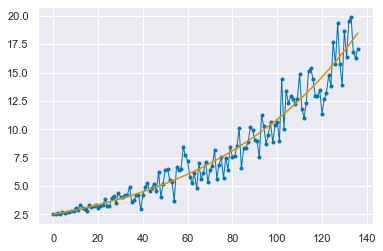

In [99]:
t = np.linspace(0, 10, 137)

x1r = 2.5 * np.exp(.2*t)

y = x1r + .2 * t * np.random.randn(len(t))

plt.plot(y, linewidth=1, marker='.')
plt.plot(x1r);

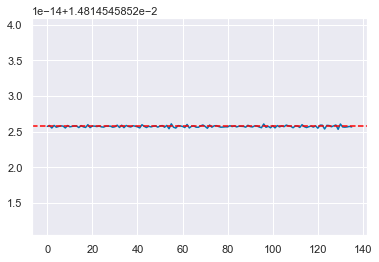

In [100]:
d1 = np.diff(x1r, n=1)
plt.plot(d1 / x1r[:-1])
theta1 = np.average(d1 / x1r[:-1])
plt.axhline(theta1, linestyle='--', color='red');

In [101]:
theta1

0.014814545851625734

In [102]:
x1 = cvx.Variable(len(t))
x2 = cvx.Variable(len(t))

phi1 = cvx.sum_squares(x1) / len(t)
phi2 = 0

constraints = [
    y == x1 + x2,
    cvx.diff(x2) == (theta1) * x2[:-1]
]

problem = cvx.Problem(cvx.Minimize(phi1), constraints)
problem.solve()

1.2599349749991513

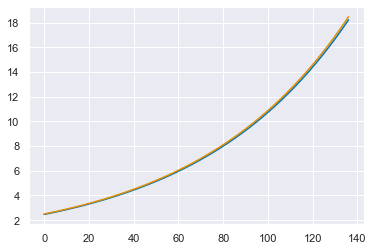

In [103]:
plt.plot(x2.value)
plt.plot(x1r)

In [104]:
theta1 * len(t) / 10

0.20295927816727258